In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def prep(data):
    images=data.iloc[:, 1:].values
    labels=data.iloc[:, 0].values
    
    images=images.astype(np.float32) / 255.0
    images=images.reshape(-1, 1, 28, 28)
    img_tensor=torch.tensor(images)
    lab_tensor=torch.tensor(labels, dtype=torch.long)
    
    dataset = TensorDataset(img_tensor, lab_tensor)
    loader=DataLoader(dataset, batch_size=64, shuffle=True)
    
    return loader

In [13]:
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

train_loader = prep(train_data)
test_loader = prep(test_data)


In [5]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  
        self.pool = nn.MaxPool2d(2, 2)  
        self.fc1 = nn.Linear(64 * 7 * 7, 128) 
        self.fc2 = nn.Linear(128, 10) 

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  
        x = self.pool(torch.relu(self.conv2(x)))  
        x = x.view(-1, 64 * 7 * 7)  
        x = torch.relu(self.fc1(x))  
        x = self.fc2(x) 
        return x

In [6]:
model = CNN()
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [7]:
epochs = 10
losses = [] 

for epoch in range(epochs):
    model.train()  
    loss = 0.0
    c,t = 0,0
    for inputs, labels in train_loader:
        optimizer.zero_grad() 
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        loss += loss.item()
        
        _, predicted = torch.max(outputs, 1)
        t += labels.size(0)
        c += (predicted == labels).sum().item()

    avg_loss = loss / len(train_loader)
    losses.append(avg_loss)  
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, Accuracy: {100 * c / t:.2f}%")

Epoch [1/10], Loss: 0.1910, Accuracy: 94.05%
Epoch [2/10], Loss: 0.0519, Accuracy: 98.38%
Epoch [3/10], Loss: 0.0364, Accuracy: 98.85%
Epoch [4/10], Loss: 0.0275, Accuracy: 99.12%
Epoch [5/10], Loss: 0.0215, Accuracy: 99.29%
Epoch [6/10], Loss: 0.0163, Accuracy: 99.44%
Epoch [7/10], Loss: 0.0128, Accuracy: 99.61%
Epoch [8/10], Loss: 0.0122, Accuracy: 99.61%
Epoch [9/10], Loss: 0.0096, Accuracy: 99.70%
Epoch [10/10], Loss: 0.0082, Accuracy: 99.72%


In [8]:
model.eval()  
c = 0
t = 0

with torch.no_grad():  
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        t += labels.size(0)
        c += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * c / t:.2f}%")

Test Accuracy: 99.12%


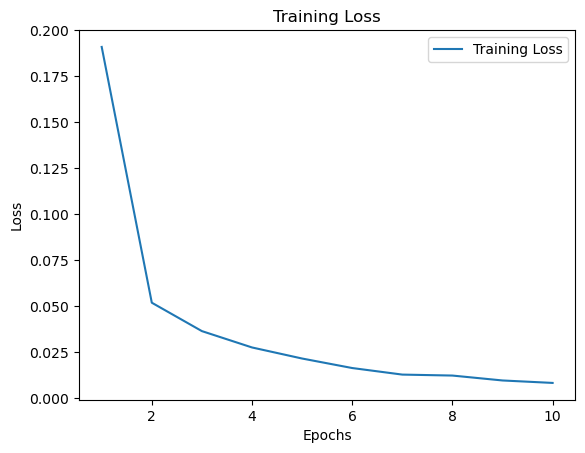

In [14]:
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

In [10]:
torch.save(model.state_dict(), 'mnist_cnn_model.pth')
print("Model saved to mnist_cnn_model.pth")

Model saved to mnist_cnn_model.pth
